# Reference
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

In [36]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [38]:
wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

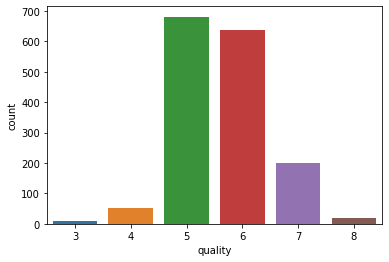

In [39]:
sns.countplot(wine['quality'])

In [40]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


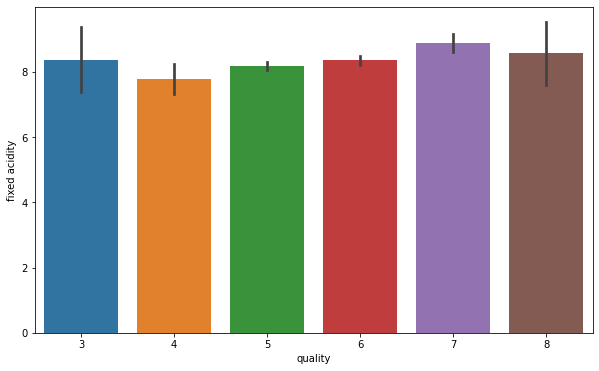

In [42]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine)

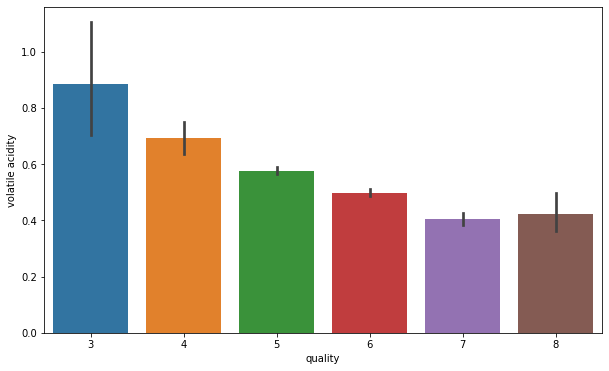

In [43]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

# 퀄리티가 높아질수록 하락

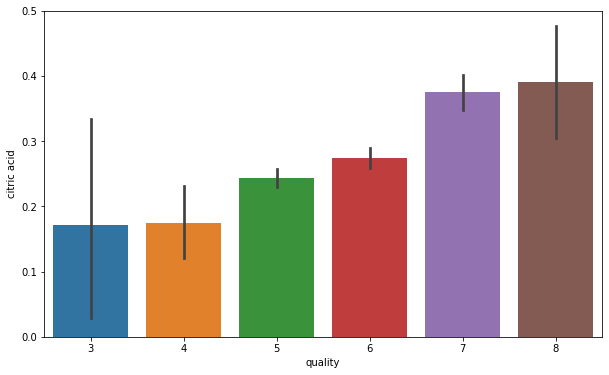

In [44]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

# 퀄리티가 높아질수록 상승

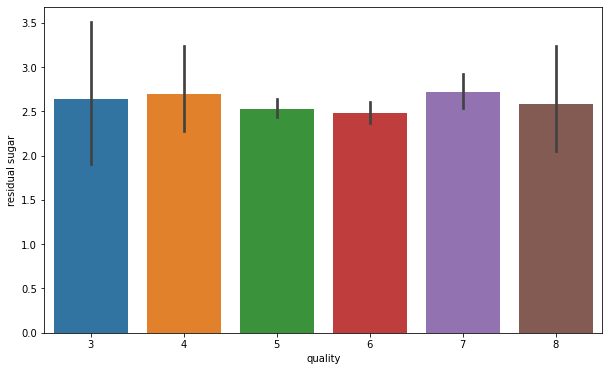

In [45]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

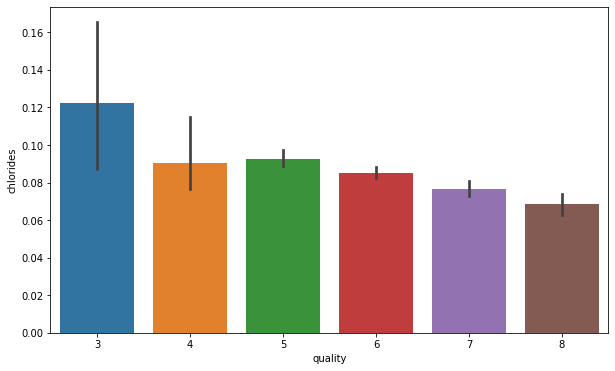

In [46]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

# 퀄리티 높을수록 하락

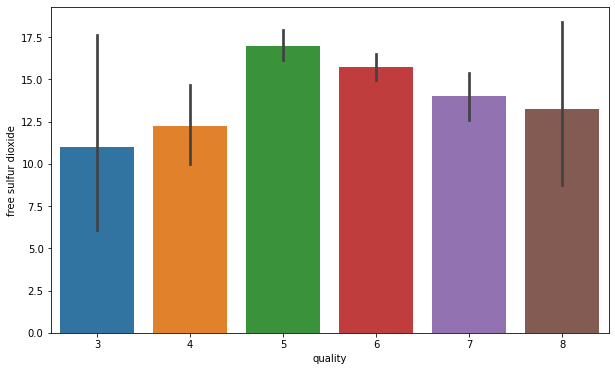

In [47]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

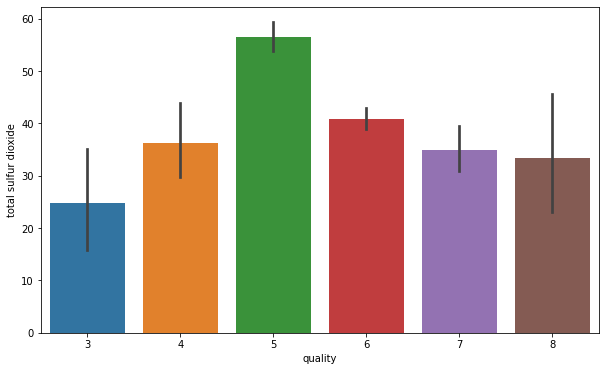

In [48]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

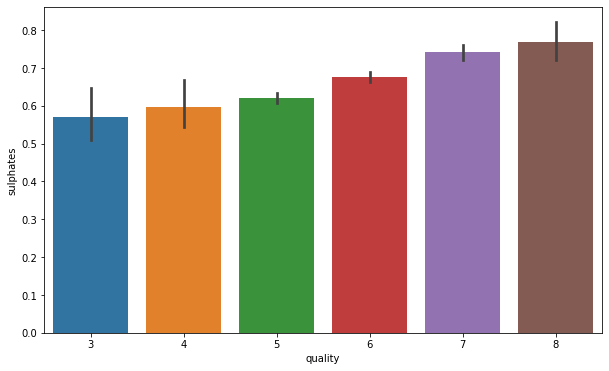

In [49]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

# 퀄리티 높아질수록 상승

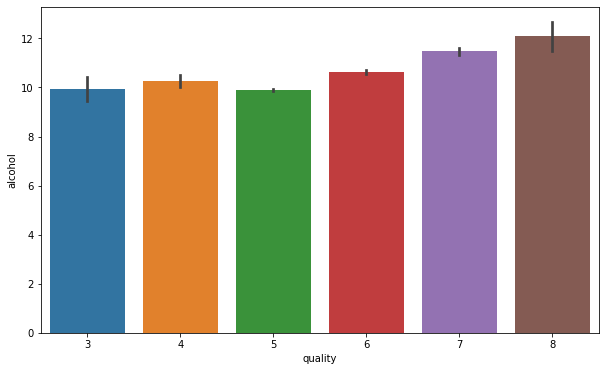

In [50]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# 퀄리티 높아질수록 상승

In [51]:
wine['quality'] = wine['quality'].apply(lambda x: '1' if x <= 4 else('2' if x <= 6 else '3'))

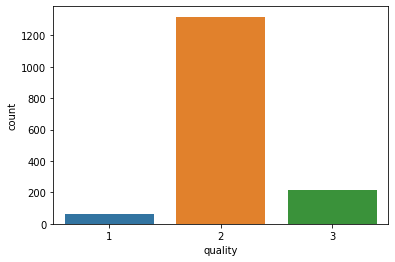

In [52]:
sns.countplot(wine['quality'])

In [53]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
sc = StandardScaler()

In [56]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Decision Tree

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred_dt = dtc.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, pred_dt)
accuracy

0.771875

In [59]:
params = {'max_depth' : [2,3,4,5,6]}
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train , y_train)
print(grid_cv.best_params_,grid_cv.best_score_)

{'max_depth': 2} 0.8483363970588236


In [60]:
dtc1 = DecisionTreeClassifier(max_depth=2)
dtc1.fit(X_train , y_train)
pred = dtc.predict(X_test)
print('예측 정확도: {0:.3f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.772


## Random Forest

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test,pred_rfc)
accuracy

0.853125

In [63]:
params = {'n_estimators':[100,150,200],'max_depth':[20,22,24,26],}
grid_cv = GridSearchCV(rfc, param_grid=params, scoring='accuracy', cv=5,n_jobs=-1)
grid_cv.fit(X_train , y_train)
print(grid_cv.best_params_,grid_cv.best_score_)

{'max_depth': 24, 'n_estimators': 150} 0.8663174019607844


In [69]:
rfc1 = RandomForestClassifier(n_estimators=150, max_depth=24)
rfc1.fit(X_train , y_train)
pred = rfc1.predict(X_test)
print('예측 정확도: {0:.3f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.850


## Gradient Boosting Machine(GBM)

In [65]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test,pred_gbc)
accuracy

0.8125

In [67]:
params = {'n_estimators':[100,150,200],'learning_rate':[0.01,0.05,0.1,0.15],}
grid_cv = GridSearchCV(gbc, param_grid=params, scoring='accuracy', cv=5,n_jobs=-1)
grid_cv.fit(X_train , y_train)
print(grid_cv.best_params_,grid_cv.best_score_)

{'learning_rate': 0.1, 'n_estimators': 200} 0.8538020833333334


In [70]:
gbc1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200)
gbc1.fit(X_train , y_train)
pred = gbc1.predict(X_test)
print('예측 정확도: {0:.3f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.828
